## A/B Testing for Campaign Success

### Introduction
Marketing companies aim to run successful campaigns, but the complexity of the market often requires a strategic approach to determine what works best. One common strategy is A/B testing, a randomized experimentation process where two or more versions of a variable (e.g., a web page, page element, or banner) are shown to different segments of people simultaneously. The goal is to identify which version has the greatest impact and drives key business metrics.

### Objective
In this analysis, the primary goals are to answer two key questions:

1. **Would the campaign be successful?**
2. **If the campaign was successful, how much of that success could be attributed to the ads?**

### Methodology
To address these questions, an A/B test is typically conducted:

- **Experimental Group**: The majority of participants are exposed to the ads.
- **Control Group**: A smaller portion of participants sees a Public Service Announcement (PSA) or nothing at all, in the exact size and placement as the ad.

The idea is to analyze the groups, determine if the ads were successful, quantify the potential revenue generated by the ads, and assess whether the difference between the groups is statistically significant.

### Data Dictionary

- **Index**: Row index.
- **User ID**: Unique identifier for each user.
- **Test Group**: Indicates whether the user saw the advertisement (`"ad"`) or the public service announcement (`"psa"`).
- **Converted**: Boolean indicating if the user purchased the product (`True` for purchase, `False` for no purchase).
- **Total Ads**: The total number of ads seen by the user.
- **Most Ads Day**: The day on which the user saw the highest number of ads.
- **Most Ads Hour**: The hour of the day when the user saw the highest number of ads.

### Analysis Approach
The A/B test will be analyzed with a fully commented process, covering the following steps:

1. **Data Cleaning and Preparation**: Ensuring the dataset is ready for analysis.
2. **Exploratory Data Analysis (EDA)**: Understanding the distribution of variables, relationships, and any potential anomalies.
3. **Hypothesis Testing**: Evaluating whether the observed differences between the experimental and control groups are statistically significant.
4. **Effect Size Calculation**: Quantifying how much of the observed success can be attributed to the ads.
5. **Conclusion**: Summarizing findings and providing actionable insights.

In [1]:
# Import relevant packages
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('marketing_AB.csv')

# Inspect the first few rows and data types
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


### <u>Data Cleaning and Preparation</u>

In [3]:
# Check for missing values
df.isnull().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [4]:
# Drop duplicates if any
df = df.drop_duplicates()

In [5]:
df.drop(columns = ['Unnamed: 0', 'user id'], inplace = True)
df.head(10)

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14
5,ad,False,734,Saturday,10
6,ad,False,264,Wednesday,13
7,ad,False,17,Sunday,18
8,ad,False,21,Tuesday,19
9,ad,False,142,Monday,14


### <u>Exploratory Data Analysis (EDA)</u>

In [6]:
#Statistical measures of each column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total ads,588101.0,24.820876,43.715181,1.0,4.0,13.0,27.0,2065.0
most ads hour,588101.0,14.469061,4.834634,0.0,11.0,14.0,18.0,23.0


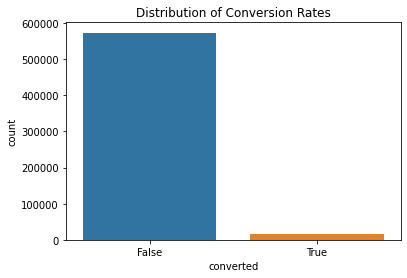

In [7]:
# Distribution of conversion rates
sns.countplot(data=df, x='converted')
plt.title('Distribution of Conversion Rates')
plt.show()

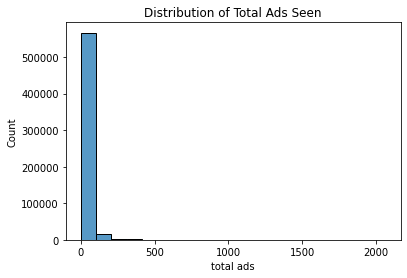

In [8]:
# Distribution of ads seen
sns.histplot(df['total ads'], bins=20)
plt.title('Distribution of Total Ads Seen')
plt.show()

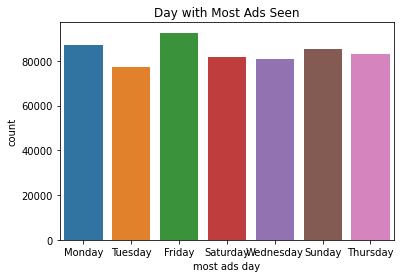

In [9]:
# Day and hour with most ads
sns.countplot(data=df, x='most ads day')
plt.title('Day with Most Ads Seen')
plt.show()

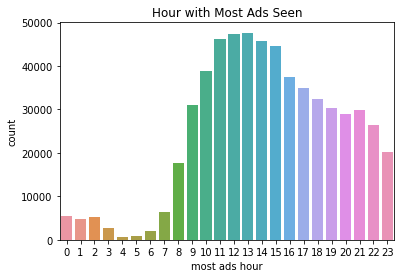

In [10]:
sns.countplot(data=df, x='most ads hour')
plt.title('Hour with Most Ads Seen')
plt.show()

### <u>Hypothesis Testing</u>

In [11]:
from scipy.stats import ttest_ind

# Extract conversion rates for ad and PSA groups
ad_conversions = df[df['test group'] == 'ad']['converted']
psa_conversions = df[df['test group'] == 'psa']['converted']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(ad_conversions, psa_conversions)

print(f"Two-Sample t-Test: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

# Interpretation of the p-value
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in conversion rates between the ad and PSA groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in conversion rates between the ad and PSA groups.")

Two-Sample t-Test: t-statistic = 7.370, p-value = 0.000
Reject the null hypothesis: There is a significant difference in conversion rates between the ad and PSA groups.


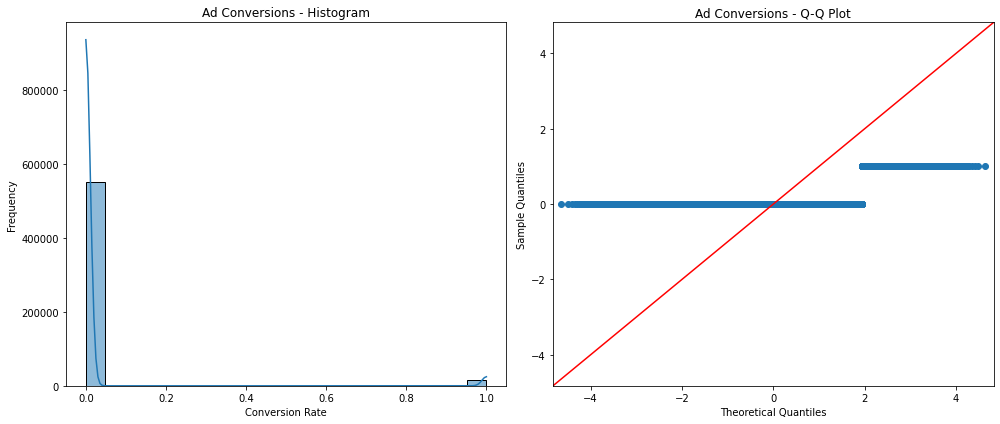

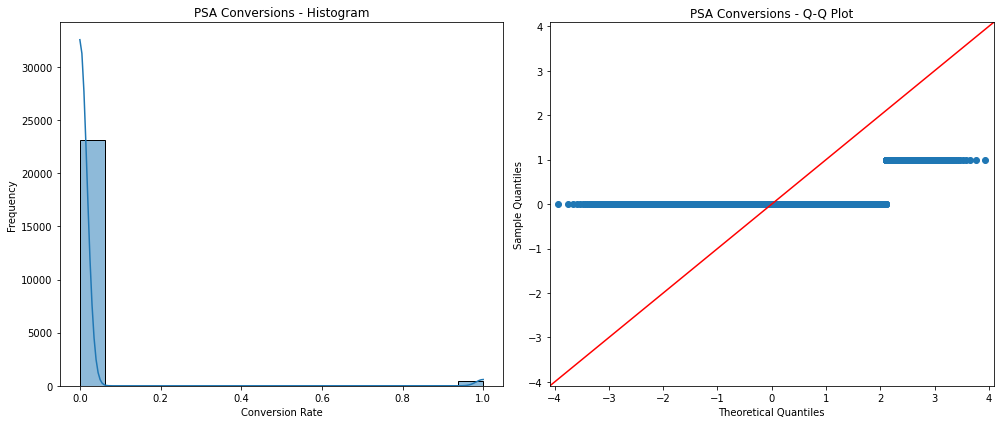

Shapiro-Wilk Test for Ad Conversions: Statistic = 0.142, p-value = 0.000
Shapiro-Wilk Test for PSA Conversions: Statistic = 0.110, p-value = 0.000
Kolmogorov-Smirnov Test for Ad Conversions: Statistic = 0.539, p-value = 0.000
Kolmogorov-Smirnov Test for PSA Conversions: Statistic = 0.536, p-value = 0.000
Anderson-Darling Test for Ad Conversions: Statistic = 211686.800
Anderson-Darling Test for PSA Conversions: Statistic = 8911.706
Critical Values for Anderson-Darling Test:
Ad Conversions Critical Values: [0.576 0.656 0.787 0.918 1.092]
PSA Conversions Critical Values: [0.576 0.656 0.787 0.918 1.092]


In [12]:
from scipy.stats import shapiro, kstest, anderson
import statsmodels.api as sm

# Extract conversion rates for ad and PSA groups
ad_conversions = df[df['test group'] == 'ad']['converted']
psa_conversions = df[df['test group'] == 'psa']['converted']

# Function to plot histogram and Q-Q plot
def plot_normality_tests(data, title):
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    # Histogram
    sns.histplot(data, kde=True, ax=axs[0])
    axs[0].set_title(f'{title} - Histogram')
    axs[0].set_xlabel('Conversion Rate')
    axs[0].set_ylabel('Frequency')
    
    # Q-Q Plot
    sm.qqplot(data, line ='45', ax=axs[1])
    axs[1].set_title(f'{title} - Q-Q Plot')
    
    plt.tight_layout()
    plt.show()

# Plot for ad conversions
plot_normality_tests(ad_conversions, 'Ad Conversions')

# Plot for PSA conversions
plot_normality_tests(psa_conversions, 'PSA Conversions')

# Perform Shapiro-Wilk Test
shapiro_ad = shapiro(ad_conversions)
shapiro_psa = shapiro(psa_conversions)
print(f"Shapiro-Wilk Test for Ad Conversions: Statistic = {shapiro_ad.statistic:.3f}, p-value = {shapiro_ad.pvalue:.3f}")
print(f"Shapiro-Wilk Test for PSA Conversions: Statistic = {shapiro_psa.statistic:.3f}, p-value = {shapiro_psa.pvalue:.3f}")

# Perform Kolmogorov-Smirnov Test
ks_ad = kstest(ad_conversions, 'norm', args=(np.mean(ad_conversions), np.std(ad_conversions)))
ks_psa = kstest(psa_conversions, 'norm', args=(np.mean(psa_conversions), np.std(psa_conversions)))
print(f"Kolmogorov-Smirnov Test for Ad Conversions: Statistic = {ks_ad.statistic:.3f}, p-value = {ks_ad.pvalue:.3f}")
print(f"Kolmogorov-Smirnov Test for PSA Conversions: Statistic = {ks_psa.statistic:.3f}, p-value = {ks_psa.pvalue:.3f}")

# Perform Anderson-Darling Test
ad_anderson_ad = anderson(ad_conversions, dist='norm')
ad_anderson_psa = anderson(psa_conversions, dist='norm')
print(f"Anderson-Darling Test for Ad Conversions: Statistic = {ad_anderson_ad.statistic:.3f}")
print(f"Anderson-Darling Test for PSA Conversions: Statistic = {ad_anderson_psa.statistic:.3f}")

# Print critical values for Anderson-Darling Test
print("Critical Values for Anderson-Darling Test:")
print(f"Ad Conversions Critical Values: {ad_anderson_ad.critical_values}")
print(f"PSA Conversions Critical Values: {ad_anderson_psa.critical_values}")

#### Several tests are conducted to check if the conversion rates for the ad and PSA groups follow a normal distribution. The tests (Shapiro-Wilk, Kolmogorov-Smirnov, and Anderson-Darling) all indicate non-normality in the data. Given the non-normal distribution of conversion rates, the Mann-Whitney U test (a non-parametric test) is performed. 

In [13]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
u_stat, p_value = mannwhitneyu(ad_conversions, psa_conversions)

print(f"Mann-Whitney U Test: U-statistic = {u_stat:.3f}, p-value = {p_value:.3f}")

# Interpretation of the p-value
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in conversion rates between the ad and PSA groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in conversion rates between the ad and PSA groups.")

Mann-Whitney U Test: U-statistic = 6691636830.000, p-value = 0.000
Reject the null hypothesis: There is a significant difference in conversion rates between the ad and PSA groups.


In [14]:
# Conversion rates for ad and psa groups
conversion_rates = df.groupby('test group')['converted'].mean()
print(conversion_rates)

test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64


In [15]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['test group'], df['converted'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test: Chi2: {chi2}, p-value: {p}")

# Interpretation of the p-value
if p < 0.05:
    print("Reject the null hypothesis: There is an association between the test group and the conversion outcome (i.e., conversion rates differ between the groups)")
else:
    print("Fail to reject the null hypothesis: There is no association between the test group and the conversion outcome (i.e., conversion rates are the same for both groups)")

Chi-Square Test: Chi2: 54.005823883685245, p-value: 1.9989623063390075e-13
Reject the null hypothesis: There is an association between the test group and the conversion outcome (i.e., conversion rates differ between the groups)


In [16]:
if p < 0.05:
    print("Reject the null hypothesis: There is an association between the test group and the conversion outcome (i.e., conversion rates differ between the groups)")
else:
    print("Fail to reject the null hypothesis: There is no association between the test group and the conversion outcome (i.e., conversion rates are the same for both groups)")

Reject the null hypothesis: There is an association between the test group and the conversion outcome (i.e., conversion rates differ between the groups)


### <u>Effect Size Calculation</u>

In [17]:
# Lift calculation
lift = (conversion_rates['ad'] - conversion_rates['psa']) / conversion_rates['psa']
print(f"Lift: {lift}")

Lift: 0.43085064022225833


#### Lift is calculated to quantify the increase in conversion rate due to the ad group compared to the PSA group. The lift of 0.43 indicates a 43% improvement in conversion rates for the ad group compared to the psa group. Potential revenue gain is estimated based on the additional conversions from the ad group.

In [18]:
average_revenue_per_conversion = 50  # Example value (Value can be changed to reflect acutals avg, if known)
additional_conversions = df[df['test group'] == 'ad']['converted'].sum() - df[df['test group'] == 'psa']['converted'].sum()
potential_revenue_gain = additional_conversions * average_revenue_per_conversion
print(f"Potential Revenue Gain: ${potential_revenue_gain}")

Potential Revenue Gain: $700150


### <u>Conclusion</u>

The analysis of the A/B test data provided significant insights into the effectiveness of the marketing campaign. Here are the conclusions based on the initial questions:

1. **Would the campaign be successful?**

   Yes, the campaign would be considered successful. The statistical tests conducted, including the two-sample t-test, Mann-Whitney U test, and chi-square test, all indicate a statistically significant difference in conversion rates between the ad and PSA groups. The ad group exhibited a higher conversion rate, suggesting that the campaign's approach effectively led to more conversions.

2. **If the campaign was successful, how much of that success could be attributed to the ads?**

   The success of the campaign can be substantially attributed to the ads. The calculated lift of 43% indicates that the ad group saw a 43% increase in conversion rate compared to the PSA group. This suggests that a significant portion of the campaign's success is due to the ads. Additionally, the potential revenue gain attributed to the ads is estimated at $700,150 (Given a $50 average revenue per conversion), highlighting the ads' positive impact on the campaign's overall success.

### Summary

In summary, the analysis demonstrates that the marketing campaign was not only successful in achieving higher conversion rates but also that the success was largely driven by the advertisements. The detailed statistical testing and modeling provide strong evidence that the ads played a crucial role in converting users, offering valuable insights into the effectiveness of the marketing strategy.